In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fashion = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

label -  2


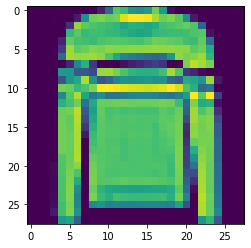

In [8]:
# view training data
index = 5
image = train_images[index]
# print(image)
print("label - ", train_labels[index])
plt.imshow(image)

In [9]:
# acc to dataset
# 0 - tshirt
# 1 - trouser
# 2 - pull overs
# 3 - dress
# 4 - coat
# 5 - sandal
# 6 - shirt
# 7 - sneaker
# 8 - bag
# 9 - ankle boots

In [10]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
# model
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
                          ])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training
model.fit(train_images, train_labels, epochs=50, batch_size=32)

Epoch 1/50
1875/1875 [==============================] - 6s 2ms/step - loss: 3.4893 - accuracy: 0.6864
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7239 - accuracy: 0.7236
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6574 - accuracy: 0.7392
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5988 - accuracy: 0.7777
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5643 - accuracy: 0.7945
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5471 - accuracy: 0.8003
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5396 - accuracy: 0.8029
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5354 - accuracy: 0.8065
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5221 - accuracy: 0.8101
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.521

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6454 - accuracy: 0.8042


[0.6453502178192139, 0.8041999936103821]

In [ ]:
model.save('/content/drive/MyDrive/notes/fashion_mnist.h5')

In [13]:
model = keras.models.load_model('/content/drive/MyDrive/notes/fashion_mnist.h5')

In [14]:
pred = model.predict(test_images[0:5])
predictions = []
for i in range (0,5):
  predictions.append(pred[i].argmax())
print(test_labels[0:5])
print(len(predictions))
print(predictions)

[9 2 1 1 6]
5
[9, 2, 1, 1, 6]


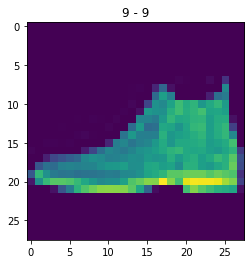

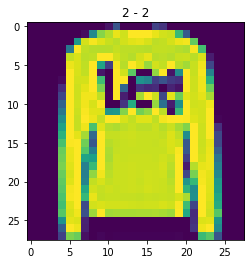

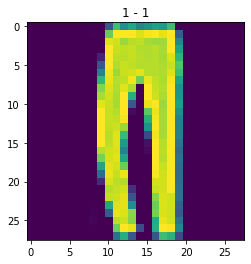

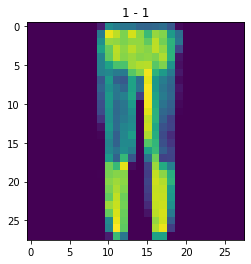

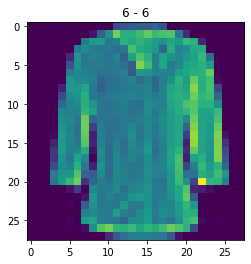

In [15]:
for i in range(0,5):
  plt.imshow(test_images[i])
  plt.title(f'{test_labels[i]} - {predictions[i]}')

  plt.show()